# Анализ поведения покупателей Яндекс.Афиши, которые пришли на сервис через разные маркетинговые каналы

Мы проанализировали данные о посещении и покупках на сервисе Яндекс.Афиша, а также о маркетинговых каналах, с потомощью которых пользователей привлекают на сайт.

Результаты нашего анализа показывают, что некоторые из маркетинговых каналов неэффективны для привлечения покупателей. Это может помочь оптимизировать маркетинговый бюджет. 

У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Мы изучили:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.


Шаг 1 [Импорт бибилиотек, изучение документов](#the_destination)

Шаг 2 [Приведение данных к нужному формату](#the_destination2)

Шаг 3 [Объединение таблиц](#the_destination3)

Шаг 4 [Посещаемость. Сколько людей пользуются в день, неделю, месяц](#the_destination4)

Шаг 5 [Посещаемость. Длительность сессий](#the_destination5)

Шаг 6 [Посещаемость. Как часто пользователи возвращаются? Retention rate](#the_destination6)

Шаг 7 [Продажи. Когда пользователи начинают покупать?](#the_destination7)

Шаг 8 [Маркетинг. ROMI](#the_destination8)

Шаг 9 [Приложение. ROMI по когортам и по источникам](#the_destination9)

Шаг 10 [Вывод](#the_destination10)

<a id='the_destination'></a>
## Импорт бибилиотек, изучение документов

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from datetime import timedelta
import datetime
import math
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_columns', 35)

In [2]:
visits=pd.read_csv('/datasets/visits_log.csv')
orders_log=pd.read_csv('/datasets/orders_log.csv')
costs=pd.read_csv('/datasets/costs.csv')

In [3]:
display(visits)
visits.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
print(visits['Device'].value_counts())

desktop    262567
touch       96833
Name: Device, dtype: int64


In [5]:
print(visits['Source Id'].value_counts())

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64


In [6]:
display(orders_log)
orders_log.info()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
display(costs)
costs.info()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Вывод
У нас есть данные о 359 тыс. пользовательских сессий и 50 тыс. покупок. Кроме этого, есть данные о 2542 рекламных кампаниях. У нас есть данные о 9 рекламных источниках и двух устройствах, с которых пользователи заходят на сайт - десктоп и мобильные.

В данных нет пропусков, однако заголовки столбцов потребуют обработки. Кроме этого, мы объединим таблицы.

<a id='the_destination2'></a>
## Приведение данных к нужному формату

In [8]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders_log.columns = orders_log.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [9]:
visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['end_ts']=pd.to_datetime(visits['end_ts'])

orders_log['buy_ts']=pd.to_datetime(orders_log['buy_ts'])
costs['dt']=pd.to_datetime(costs['dt'])

<a id='the_destination3'></a>
## Объединение таблиц

Совместим данные о покупках и пользовательских сессиях так, чтобы данные о покупках помещались в отдельной колонке в новой объединенной таблице наряду с данными о начале и конце пользовательских сессий.

Для начала создадим большую таблицу, где будут все варианты сочетания пользовательских сессий и покупок.

In [10]:
df=pd.merge(visits, orders_log, on='uid', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023813 entries, 0 to 1023812
Data columns (total 7 columns):
device       1023813 non-null object
end_ts       1023813 non-null datetime64[ns]
source_id    1023813 non-null int64
start_ts     1023813 non-null datetime64[ns]
uid          1023813 non-null uint64
buy_ts       761807 non-null datetime64[ns]
revenue      761807 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(1), object(1), uint64(1)
memory usage: 62.5+ MB


Затем отберем те, что совпадают по времени. 

In [11]:
purchases_inside_sessions=df.query('buy_ts>=start_ts & buy_ts<= end_ts')
purchases_inside_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35927 entries, 4 to 1023810
Data columns (total 7 columns):
device       35927 non-null object
end_ts       35927 non-null datetime64[ns]
source_id    35927 non-null int64
start_ts     35927 non-null datetime64[ns]
uid          35927 non-null uint64
buy_ts       35927 non-null datetime64[ns]
revenue      35927 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(1), object(1), uint64(1)
memory usage: 2.2+ MB


Нам удалось соотнести с сессиями данные только 70% покупок (35927 из 50415). Выходит, у нас неполный датасет и часть данных о пользовательских сессиях утрачено.

Мы добавим в общую таблицу те данные, что смогли собрать. Там, где у данных о покупке отсутствуют данные о начале сессии, приравняем его к времени покупки.

In [12]:
orders_plus_purchases=pd.merge(purchases_inside_sessions, orders_log, on=['uid', 'buy_ts', 'revenue'], how='outer')
orders_plus_purchases_missing=orders_plus_purchases.query('start_ts != start_ts')
orders_plus_purchases_missing['start_ts']=orders_plus_purchases_missing['buy_ts']
orders_plus_purchases_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14488 entries, 35927 to 50414
Data columns (total 7 columns):
device       0 non-null object
end_ts       0 non-null datetime64[ns]
source_id    0 non-null float64
start_ts     14488 non-null datetime64[ns]
uid          14488 non-null uint64
buy_ts       14488 non-null datetime64[ns]
revenue      14488 non-null float64
dtypes: datetime64[ns](3), float64(2), object(1), uint64(1)
memory usage: 905.5+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
visits_plus_purchases=pd.merge(visits, orders_plus_purchases, on=['uid','device','end_ts', 'source_id', 'start_ts'], how='left')
visits_plus_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 7 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
buy_ts       35927 non-null datetime64[ns]
revenue      35927 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(1), object(1), uint64(1)
memory usage: 21.9+ MB


In [14]:
visits_plus_purchases=pd.concat([visits_plus_purchases, orders_plus_purchases_missing])
visits_plus_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373888 entries, 0 to 50414
Data columns (total 7 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null float64
start_ts     373888 non-null datetime64[ns]
uid          373888 non-null uint64
buy_ts       50415 non-null datetime64[ns]
revenue      50415 non-null float64
dtypes: datetime64[ns](3), float64(2), object(1), uint64(1)
memory usage: 22.8+ MB


Наша итоговая таблица состоит из:
1. Данных таблицы visits с пользовательскими сессиями.
2. К ней присоединены данные о покупках, соответствующих сессиям по времени.
3. Данные о покупках, для которых не нашлось сессий, тоже присоединены. Они дополнены временем начала сессии (= времени покупки).

Приведем колонки с датами к форматам даты, дополним таблицу колонками с месяцами, неделями и днями.

In [15]:
visits_plus_purchases['start_ts']=pd.to_datetime(visits_plus_purchases['start_ts'])
visits_plus_purchases['start_date_only'] = visits_plus_purchases["start_ts"].dt.strftime("%d.%m.%y")

#visits_plus_purchases['start_date_only'] = visits_plus_purchases["start_ts"].dt.strftime("%d.%m.%y")


#visits_plus_purchases['start_time'] = visits_plus_purchases["start_ts"].dt.strftime("%H:%M:%S")

visits_plus_purchases['start_month'] = visits_plus_purchases["start_ts"].astype('datetime64[M]')
visits_plus_purchases['start_week'] = visits_plus_purchases["start_ts"].astype('datetime64[W]')
visits_plus_purchases['start_day'] = visits_plus_purchases["start_ts"].astype('datetime64[D]')

visits_plus_purchases['buy_ts']=pd.to_datetime(visits_plus_purchases['buy_ts'])
visits_plus_purchases['buy_date_only'] = visits_plus_purchases['buy_ts'].dt.strftime("%d.%m.%y")
#visits_plus_purchases['buy_time'] = visits_plus_purchases['buy_ts'].dt.strftime("%H:%M:%S")


visits_plus_purchases['buy_month'] = visits_plus_purchases['buy_ts'].astype('datetime64[M]')
visits_plus_purchases['buy_week'] = visits_plus_purchases['buy_ts'].astype('datetime64[W]')
visits_plus_purchases['buy_day'] = visits_plus_purchases['buy_ts'].astype('datetime64[D]')

costs['month']=costs['dt'].astype('datetime64[M]')


<a id='the_destination4'></a>
## Посещаемость. Сколько людей пользуются в день, неделю, месяц?

In [16]:
print("Сколько всего пользователей заходит на сайт:", visits_plus_purchases['uid'].nunique())

Сколько всего пользователей заходит на сайт: 228169


In [17]:
print("Сколько всего покупателей на сайте:", visits_plus_purchases.query('buy_month==buy_month')['uid'].nunique())

Сколько всего покупателей на сайте: 36523


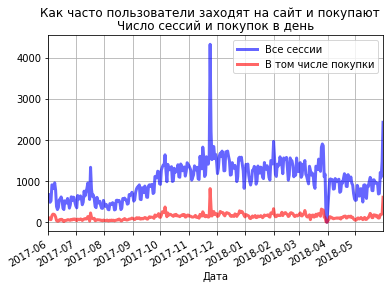

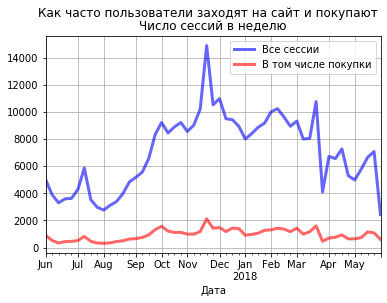

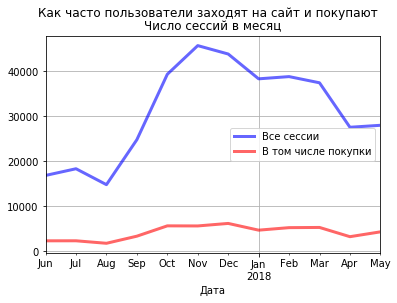

In [18]:
groupbydate=visits_plus_purchases.pivot_table(index='start_day', values=['uid', 'revenue'],
                                              aggfunc={'uid':'count', 'revenue':[sum, 'count']}).reset_index()
new_names = ['start_day', 'revenue_count', 'revenue_sum', 'sessions_count']

groupbydate.set_axis(new_names, axis = 'columns', inplace = True)

groupbydate.plot(x='start_day', y=['sessions_count', 'revenue_count'],
                 kind="line", legend=True, lw=3, color=['blue', 'red'], alpha=0.6, label=['Все сессии', 'В том числе покупки'], grid=True)

subtitle_string = "Как часто пользователи заходят на сайт и покупают"
title_string = "Число сессий и покупок в день"

plt.xlabel('Дата')

plt.suptitle(subtitle_string)
plt.title(title_string)
plt.legend();

groupbyweek=visits_plus_purchases.pivot_table(
    index='start_week',
    values=['uid', 'revenue'],
    aggfunc='count').reset_index()

groupbyweek.plot(x='start_week', y=['uid', 'revenue'],
                 kind="line", legend=True, lw=3, color=['blue', 'red'], alpha=0.6, label=['Все сессии', 'В том числе покупки'], grid=True)

subtitle_string = "Как часто пользователи заходят на сайт и покупают"
title_string = "Число сессий в неделю"

plt.xlabel('Дата')

plt.suptitle(subtitle_string)
plt.title(title_string)
plt.legend();

groupbymonth=visits_plus_purchases.pivot_table(
    index='start_month',
    values=['uid', 'revenue'],
    aggfunc='count').reset_index()

groupbymonth.plot(x='start_month', y=['uid', 'revenue'],
                  kind="line", legend=True, lw=3, color=['blue', 'red'], alpha=0.6, label=['Все сессии', 'В том числе покупки'], grid=True)

subtitle_string = "Как часто пользователи заходят на сайт и покупают"
title_string = "Число сессий в месяц"

plt.xlabel('Дата')

plt.suptitle(subtitle_string)
plt.title(title_string)
plt.legend();



In [19]:
print('Среднее число сессий в день:', groupbydate['sessions_count'].mean().astype(int))
print('Среднее число покупок в день:', groupbydate['revenue_count'].mean().astype(int))
print()
print('Среднее число сессий в неделю:', groupbyweek['uid'].mean().astype(int))
print('Среднее число покупок в неделю:', groupbyweek['revenue'].mean().astype(int))
print()
print('Среднее число сессий в месяц:', groupbymonth['uid'].mean().astype(int))
print('Среднее число покупок в месяц:', groupbymonth['revenue'].mean().astype(int))

Среднее число сессий в день: 1027
Среднее число покупок в день: 138

Среднее число сессий в неделю: 7054
Среднее число покупок в неделю: 951

Среднее число сессий в месяц: 31157
Среднее число покупок в месяц: 4201


В изученный год число пользовательских сессий в день колебалось от 500 до 1,5 тыс. Наблюдались однодневные пики с большей посещаемостью - до более чем 4 тыс. в день. Недельная посещаемость колебалась от 3 до почти 15 тыс. сессий.

В целом в последние месяцы наблюдается спад пользовательской активности по сравнению с предыдущим периодом. В конце изучаемого периода наметился пик активноси, который может оказаться кратковременным.

С августа по ноябрь происходил рост посещаемости сайта - она выросла с меньше чем 15-18 тыс. пользовательских сессий в месяц до примерно 45 тыс. Затем посещаемость пошла на спад. В последние два месяца она составляет около 28 тыс. в месяц.

На графике видны отдельные дни с пиковой посещаемостью, когда на сайт пришло больше 4 тыс. человек.

В среднем 13% пользовательских сессий заканчиваются покупкой.

<a id='the_destination5'></a>
## Посещаемость. Длительность сессий

Узнаем, как долго длятся пользовательские сессии. 

In [20]:
visits_plus_purchases['duration_min']=visits_plus_purchases['end_ts']-visits_plus_purchases['start_ts']
visits_plus_purchases['duration_min']=visits_plus_purchases['duration_min'].astype('timedelta64[s]')
visits_plus_purchases['duration_min']=visits_plus_purchases['duration_min']/60

In [21]:
visits_plus_purchases.sort_values(by='duration_min').head(5)

,device,end_ts,source_id,start_ts,uid,buy_ts,revenue,start_date_only,start_month,start_week,start_day,buy_date_only,buy_month,buy_week,buy_day,duration_min
177972,desktop,2018-03-25 03:09:00,9.0,2018-03-25 03:55:00,4621202742905035453,NaT,NaN,25.03.18,2018-03-01,2018-03-22,2018-03-25,NaT,NaT,NaT,NaT,-46.0
4181,desktop,2018-03-25 03:18:00,3.0,2018-03-25 03:50:00,13092152539246794986,NaT,NaN,25.03.18,2018-03-01,2018-03-22,2018-03-25,NaT,NaT,NaT,NaT,-32.0
141593,desktop,2018-01-25 20:55:00,4.0,2018-01-25 20:55:00,6885023040148462867,NaT,NaN,25.01.18,2018-01-01,2018-01-25,2018-01-25,NaT,NaT,NaT,NaT,0.0
251174,desktop,2018-02-08 15:35:00,3.0,2018-02-08 15:35:00,6843418812504165819,NaT,NaN,08.02.18,2018-02-01,2018-02-08,2018-02-08,NaT,NaT,NaT,NaT,0.0
70748,desktop,2018-02-28 16:18:00,2.0,2018-02-28 16:18:00,4903558401822217411,NaT,NaN,28.02.18,2018-02-01,2018-02-22,2018-02-28,NaT,NaT,NaT,NaT,0.0


Мы видим, что в таблице есть сессии, где конец сессии раньше начала. Возможно, тут просто перепутан порядок, но так как их всего две, их можно удалить.

In [22]:
visits_plus_purchases = visits_plus_purchases.drop(visits_plus_purchases[(visits_plus_purchases['duration_min']<0)].index)
    

На длительность сессий может влиять тип устройства, с которого заходит пользователь. Узнаем, сколько пользователей заходили с разных устройств.

In [23]:
visits_plus_purchases['device'].value_counts()

desktop    262565
touch       96833
Name: device, dtype: int64

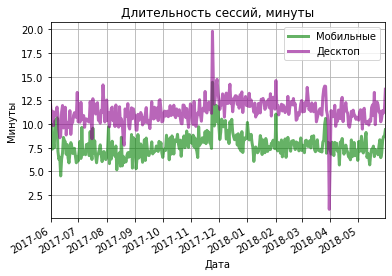

In [24]:
groupbyday_duration_touch=visits_plus_purchases.query('device=="touch"').pivot_table(index='start_day', values='duration_min', aggfunc='mean').reset_index()
groupbyday_duration_desktop=visits_plus_purchases.query('device=="desktop"').pivot_table(index='start_day', values='duration_min', aggfunc='mean').reset_index()

ax = groupbyday_duration_touch.plot(x='start_day', y='duration_min', kind="line", legend=True, label='Мобильные', lw=3, color='green', alpha=0.6)

groupbyday_duration_desktop.plot(ax=ax, x='start_day', y='duration_min', kind="line", legend=True, label='Десктоп', lw=3, color='darkmagenta', alpha=0.6, grid=True)
plt.title('Длительность сессий, минуты')
plt.xlabel('Дата')
plt.ylabel('Минуты');

Пользовательские сессии с мобильного длятся около 7,5 минут, а с десктопа - 10-13 минут. В апреле 2018 года мы видим, вероятно, падение сайта.

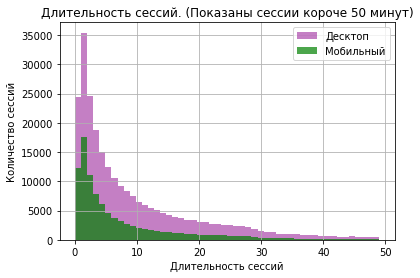

In [25]:
visits_plus_purchases.query('duration_min<50&device=="desktop"')['duration_min'].hist(bins=50, label='Десктоп', color='darkmagenta', alpha=0.5)
visits_plus_purchases.query('duration_min<50&device=="touch"')['duration_min'].hist(bins=50, label='Мобильный', color="green", alpha=0.7)
plt.legend()

plt.title('Длительность сессий. (Показаны сессии короче 50 минут)')
plt.xlabel('Длительность сессий')
plt.ylabel('Количество сессий');

И на мобильном, и на десктопе некоторые сессии длятся 0 минут.  

In [26]:
print("Число пользовательских сессий разной длительности. Десктоп:")
visits_plus_purchases.query('duration_min==0').groupby('device')['duration_min'].count()

Число пользовательских сессий разной длительности. Десктоп:


device
desktop    23689
touch      12105
Name: duration_min, dtype: int64

На десктопе 9% пользовательских сессий длятся 0 секунд, на мобильном - 12,5%. Это значит, что на мобильном могут быть технические проблемы с сайтом: он хуже прогружается или не открывается в некоторых браузерах.

Посмотрим, как долго длятся сессии с покупкой и без.

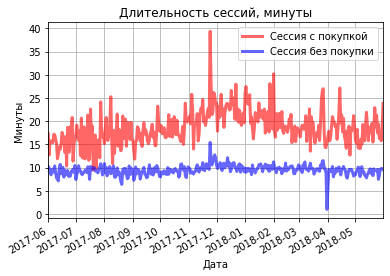

In [27]:
groupbyday_duration_purchase=visits_plus_purchases.query('buy_month==buy_month').pivot_table(index='start_day', values='duration_min', aggfunc='mean').reset_index()
groupbyday_duration_not=visits_plus_purchases.query('buy_month!=buy_month').pivot_table(index='start_day', values='duration_min', aggfunc='mean').reset_index()

ax = groupbyday_duration_purchase.plot(x='start_day', y='duration_min', kind="line", legend=True, label='Сессия с покупкой', lw=3, color='red', alpha=0.6)

groupbyday_duration_not.plot(ax=ax, x='start_day', y='duration_min', kind="line", legend=True, label='Сессия без покупки', lw=3, color='blue', alpha=0.6, grid=True)
plt.title('Длительность сессий, минуты')
plt.xlabel('Дата')
plt.ylabel('Минуты');

Сессии, которые оканчиваются покупкой, длиннее тех, когда покупок нет. Сессия без покупки длится около 10 минут, а с покупкой - обычно 15-20 минут и больше. Большинство сессий, которые заканчиваются покупкой, длятся как минимум 9 минут.

Однако, есть сессии, которые заканчиваются покупкой, но при этом длятся 0 минут. Я знаю, что это занудство, но, возможно, тут техническая проблема с выгрузкой датасетов (или проблема с тем, как я объединила таблицы).

In [28]:
visits_plus_purchases.query('buy_month==buy_month&duration_min==0')['duration_min'].value_counts()

0.0    476
Name: duration_min, dtype: int64

<a id='the_destination6'></a>
## Посещаемость. Как часто пользователи возвращаются? Retention rate

In [29]:
dau_total = visits_plus_purchases.groupby('start_day').agg({'uid': 'nunique'}).mean()
wau_total = visits_plus_purchases.groupby(['start_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits_plus_purchases.groupby(['start_month']).agg({'uid': 'nunique'}).mean()

print("DAU (Количество уникальных пользователей в день):", int(dau_total))
print("WAU (Количество уникальных пользователей в неделю):", int(wau_total))
print("MAU (Количество уникальных пользователей в месяц):", int(mau_total))


sticky_wau = (dau_total/wau_total)*100
sticky_mau = (dau_total/mau_total)*100

print("sticky_wau:", int(sticky_wau))
print("sticky_mau:", int(sticky_mau))

DAU (Количество уникальных пользователей в день): 930
WAU (Количество уникальных пользователей в неделю): 5818
MAU (Количество уникальных пользователей в месяц): 23469
sticky_wau: 15
sticky_mau: 3


В среднем в день на сайте было 930 уникальных посетителей, в неделю - 5,8 тыс., а в месяц 23,5 тыс.
Показатель sticky_mau очень низкий, всего три. Это значит, что пользователи редко возвращаются на сайт.

In [30]:
dau_total_buy = visits_plus_purchases.query('buy_month==buy_month').groupby('start_day').agg({'uid': 'nunique'}).mean()
wau_total_buy = visits_plus_purchases.query('buy_month==buy_month').groupby(['start_week']).agg({'uid': 'nunique'}).mean()
mau_total_buy = visits_plus_purchases.query('buy_month==buy_month').groupby(['start_month']).agg({'uid': 'nunique'}).mean()

print("DAU (Количество уникальных покупателей в день):", int(dau_total_buy))
print("WAU (Количество уникальных покупателей в неделю):", int(wau_total_buy))
print("MAU (Количество уникальных покупателей в месяц):", int(mau_total_buy))


sticky_wau_buy = (dau_total_buy/wau_total_buy)*100
sticky_mau_buy = (dau_total_buy/mau_total_buy)*100


print("sticky_wau_buy:", int(sticky_wau))
print("sticky_mau_buy:", int(sticky_mau))

DAU (Количество уникальных покупателей в день): 128
WAU (Количество уникальных покупателей в неделю): 818
MAU (Количество уникальных покупателей в месяц): 3418
sticky_wau_buy: 15
sticky_mau_buy: 3


Приверженность покупателей к сайту такая же, как посетителей в целом. Возможно, это не очень хороший знак, ведь покупатели могли бы стать постоянными лояльными пользователями.

In [31]:
print("Число уникальных посетителей:", visits_plus_purchases['uid'].nunique())
print("Число визитов:", visits_plus_purchases['uid'].count())

Число уникальных посетителей: 228169
Число визитов: 373886


В среднем каждый пользователь приходил на сайт 1,6 раз.

In [32]:
how_often=visits_plus_purchases.groupby('uid')['start_ts'].count().reset_index()
how_often['start_ts'].describe([.5, .6, .65, .75, .77, .87, .9, .95]).astype(int)

count    228169
mean          1
std           5
min           1
50%           1
60%           1
65%           1
75%           1
77%           2
87%           2
90%           3
95%           4
max         893
Name: start_ts, dtype: int64

Больше 70% пользователей посещали сайт за изученный период (12 месяцев) лишь один раз. Около 5% пользователей посещали сайт 4 и больше раз.

Расчитаем retention rate для пользователей, пришедших на сайт впервые в разные месяцы. Для начала найдем дату первого визита каждого пользователя.

In [33]:
first_order_date=visits_plus_purchases.groupby('uid')['start_day', 'buy_day'].min()
first_order_date=first_order_date.reset_index()
display(first_order_date)
first_order_date.columns=('uid', 'first_visit_day', 'first_purchase_day')

first_order_date['first_visit_month']=first_order_date['first_visit_day'].astype('datetime64[M]')
first_order_date['first_purchase_month']=first_order_date['first_purchase_day'].astype('datetime64[M]')
visits_plus_purchases=pd.merge(visits_plus_purchases, first_order_date, on='uid', how='left')

,uid,start_day,buy_day
0,11863502262781,2018-03-01,NaT
1,49537067089222,2018-02-06,NaT
2,297729379853735,2017-06-07,NaT
3,313578113262317,2017-09-18,2018-01-03
4,325320750514679,2017-09-30,NaT
...,...,...,...
228164,18446403737806311543,2017-11-30,NaT
228165,18446424184725333426,2017-12-06,NaT
228166,18446556406699109058,2018-01-01,NaT
228167,18446621818809592527,2017-12-27,NaT


In [34]:
cohort_sizes = visits_plus_purchases.groupby('first_visit_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_visit_month', 'n_buyers_initialy']

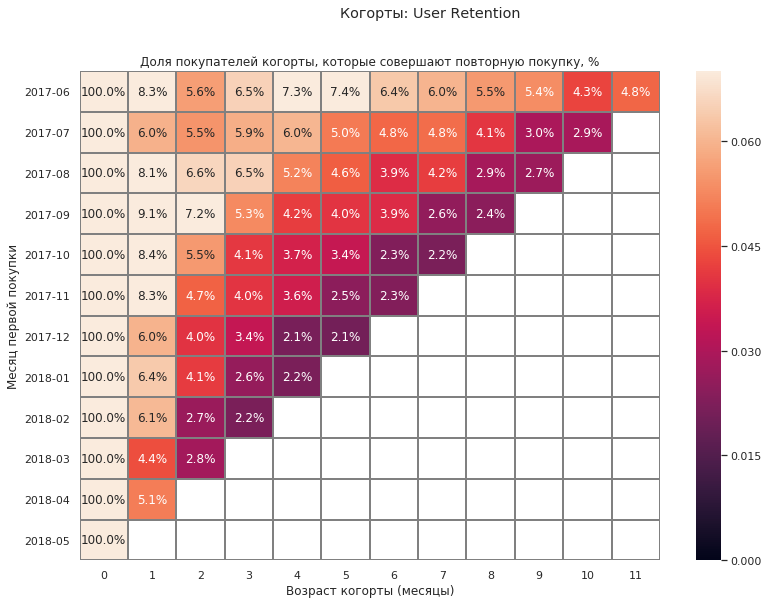

In [35]:
orders_grouped_by_cohorts = visits_plus_purchases.groupby(['first_visit_month','start_month']).agg({'revenue':'sum','start_day':'count', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns=('first_visit_month', 'start_month', 'revenue', 'count_purchases', 'count_users')

orders_grouped_by_cohorts['age'] = (orders_grouped_by_cohorts['start_month'] - orders_grouped_by_cohorts['first_visit_month'])/ np.timedelta64(1, 'M')
orders_grouped_by_cohorts['age'] = orders_grouped_by_cohorts['age'].round().astype('int')


orders_grouped_by_cohorts=pd.merge(orders_grouped_by_cohorts, cohort_sizes, on='first_visit_month', how='left')

orders_grouped_by_cohorts['retention']=orders_grouped_by_cohorts['count_users']/orders_grouped_by_cohorts['n_buyers_initialy']
retention_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_visit_month',columns='age',values='retention',aggfunc='sum').reset_index()



retention_pivot['first_visit_month']=retention_pivot['first_visit_month'].dt.strftime('%Y-%m')
retention_pivot=retention_pivot.set_index('first_visit_month')




sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.suptitle('Когорты: User Retention')
plt.title('Доля покупателей когорты, которые совершают повторную покупку, %')

sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.07)
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');


Очень мало пользователей возвращается после первого посещения. К последним месяцам жизни когорты активность пользователей почти сходит на нет. На второй месяц после первого посещения в большинстве когорт посещаемость составляла 6-9% от уровня первого месяца, а к последним месяцам жизни большинства когорт не превышала 3%. 

## Вывод

В изученный год число пользовательских сессий в день колебалось от 500 до 1,5 тыс. Наблюдались однодневные пики с большей посещаемостью - до более чем 4 тыс. в день. Недельная посещаемость колебалась от 3 до почти 15 тыс. сессий.

В целом в последние месяцы наблюдается спад пользовательской активности по сравнению с предыдущим периодом. В конце изучаемого периода наметился пик активноси, который может оказаться кратковременным.

С августа по ноябрь происходил рост посещаемости сайта - она выросла с меньше чем 15-18 тыс. пользовательских сессий в месяц до примерно 45 тыс. Затем посещаемость пошла на спад. В последние два месяца она составляет около 28 тыс. в месяц.

На графике видны отдельные дни с пиковой посещаемостью, когда на сайт пришло больше 4 тыс. человек.

13% пользовательских сессий заканчиваются покупкой.

Пользовательские сессии с мобильного длятся около 7,5 минут, а с десктопа - 10-13 минут.

На десктопе 9% пользовательских сессий длятся 0 секунд, на мобильном - 12,5%. Это значит, что на мобильном могут быть технические проблемы с сайтом: он хуже прогружается или не открывается в некоторых браузерах.

В среднем один пользователь посетил сайт за год один раз.

Больше 70% пользователей посещали сайт за изученный период (12 месяцев) лишь один раз. Около 5% пользователей посещали сайт 4 и больше раз.

Очень мало пользователей возвращается после первого посещения. К последним месяцам жизни когорты активность пользователей почти сходит на нет. На второй месяц после первого посещения в большинстве когорт посещаемость составляла 6-9% от уровня первого месяца, а к последним месяцам жизни большинства когорт не превышала 3%. 

<a id='the_destination7'></a>
## Продажи. Когда пользователи начинают покупать?

In [36]:
print('Число покупателей:', visits_plus_purchases.query('buy_month==buy_month')['uid'].nunique())

Число покупателей: 36523


16% пользователей, посетивших сайт, совершили покупки (36,5 тыс. из 228 тыс.)

Как скоро после первого визита на сайт пользователи совершают покупку? Посчитаем разницу между датой первой покупки и первого визита.

In [37]:
first_order_date['difference']=(first_order_date['first_purchase_day']-first_order_date['first_visit_day']).astype('timedelta64[D]')
first_order_date.query('difference==difference')['difference'].describe([.60, .65, .69, .7, .75, .85, .9, .95])

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
50%          0.000000
60%          0.000000
65%          0.000000
69%          1.000000
70%          1.000000
75%          2.000000
85%         22.000000
90%         58.000000
95%        124.000000
max        363.000000
Name: difference, dtype: float64

Почти 70% покупателей совершают первую покупку в день первого визита. 10% покупателей - спустя два месяца после первого визита и больше.

Сколько времени нужно покупателю для совершения покупки после начала сессии? Рассмотрим только данные сессий, завершившихся покупкой.

In [38]:
time=visits_plus_purchases.query('buy_month==buy_month')
time['time_difference']=(time['buy_ts']-time['start_ts']).astype('timedelta64[m]')

time['time_difference'].describe([.2, .35, .4, .5, .7, .9])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    50415.000000
mean         7.012318
std         12.972140
min          0.000000
20%          0.000000
35%          0.000000
40%          1.000000
50%          2.000000
70%          7.000000
90%         20.000000
max        326.000000
Name: time_difference, dtype: float64

Больше 35% покупателей совершают покупку меньше чем за минуту, половина успевает за две, а 90% пользователей укладывается в 20 минут.

Узнаем, сколько покупателей совершили разное число покупок.

In [39]:
how_often_buy=visits_plus_purchases.query('buy_month==buy_month')
how_often_buy=how_often_buy.groupby('uid')['start_ts'].count().reset_index()
print()
how_often_buy['start_ts'].describe([.75, .80, .83, .85, .90, .95, .98])

count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
50%          1.000000
75%          1.000000
80%          1.000000
83%          2.000000
85%          2.000000
90%          2.000000
95%          3.000000
98%          4.000000
max        239.000000
Name: start_ts, dtype: float64

Лишь 17% покупателей за год совершили больше одной покупки, 2% пользователей совершили 4 покупки.

In [40]:
when_buy=visits_plus_purchases.pivot_table(index='uid', values=['start_day', 'buy_month'], aggfunc='count').reset_index()
when_buy['culc']=when_buy['start_day']/when_buy['buy_month']
when_buy.query('buy_month>0')['culc'].describe([.35, .44, .45, .47, .50, .75, .85, .90, .95, .97])

count    36523.000000
mean         2.134826
std          2.985127
min          1.000000
35%          1.000000
44%          1.000000
45%          1.333333
47%          1.500000
50%          2.000000
75%          2.000000
85%          3.000000
90%          4.000000
95%          5.000000
97%          6.000000
max        228.000000
Name: culc, dtype: float64

44% пользователей совершают одинаковое количество визитов и покупок. Примерно 25% пользователей посещают сайт в два раза больше раз, чем совершают покупки (это может быть два визита на одну покупку). Можно сделать вывод, что многие покупатели не посещают сайт, чтобы изучить продукт или новинки, а делают это единожды во время покупки. Возможно, таким покупателям стоит отправлять таргетные предложения.

Узнаем средний чек.

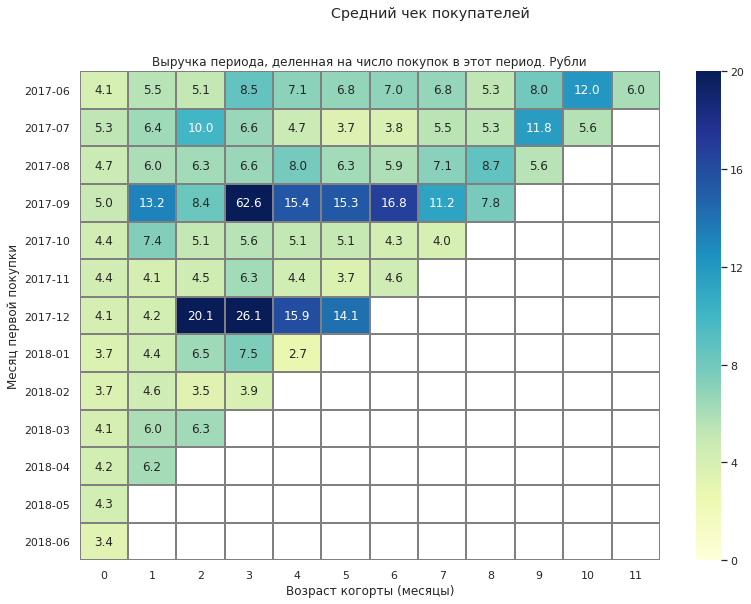

In [41]:
orders_grouped_by_cohorts = visits_plus_purchases.query('buy_month==buy_month').groupby(['first_purchase_month','buy_month']).agg({'revenue':'sum','buy_week':'count', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns=('first_purchase_month', 'buy_month', 'revenue', 'count_purchases', 'count_users')

orders_grouped_by_cohorts['age'] = (orders_grouped_by_cohorts['buy_month'] - orders_grouped_by_cohorts['first_purchase_month'])/ np.timedelta64(1, 'M')
orders_grouped_by_cohorts['age'] = orders_grouped_by_cohorts['age'].round().astype('int')

cohort_sizes_first_purchase_month = visits_plus_purchases.query('buy_month==buy_month').groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_first_purchase_month['first_purchase_month'] = cohort_sizes_first_purchase_month['first_purchase_month']

cohort_sizes_first_purchase_month.columns = ['first_purchase_month', 'n_buyers_initialy']

orders_grouped_by_cohorts=pd.merge(orders_grouped_by_cohorts, cohort_sizes_first_purchase_month, on='first_purchase_month', how='left')

#.dt.strftime('%Y-%m')

orders_grouped_by_cohorts['average_check']=orders_grouped_by_cohorts['revenue']/orders_grouped_by_cohorts['count_purchases']

a=orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='age',
    values='average_check',
    aggfunc='mean').reset_index()

a['first_purchase_month']=a['first_purchase_month'].dt.strftime('%Y-%m')

a=a.set_index('first_purchase_month')

plt.figure(figsize=(13, 9))
plt.title('Выручка периода, деленная на число покупок в этот период. Рубли')
plt.suptitle('Средний чек покупателей')

sns.heatmap(a, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=20)
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

Самые высокие средние чеки - у покупателей 4, 7 когорт. В некоторые месяцы средние чеки этих покупателей превышали 20 рублей. Однако в некоторых когортах чеки стабильно низкие.

Рассчитаем LTV, чтобы узнать, сколько в среднем приносит один покупатель каждой когорты.

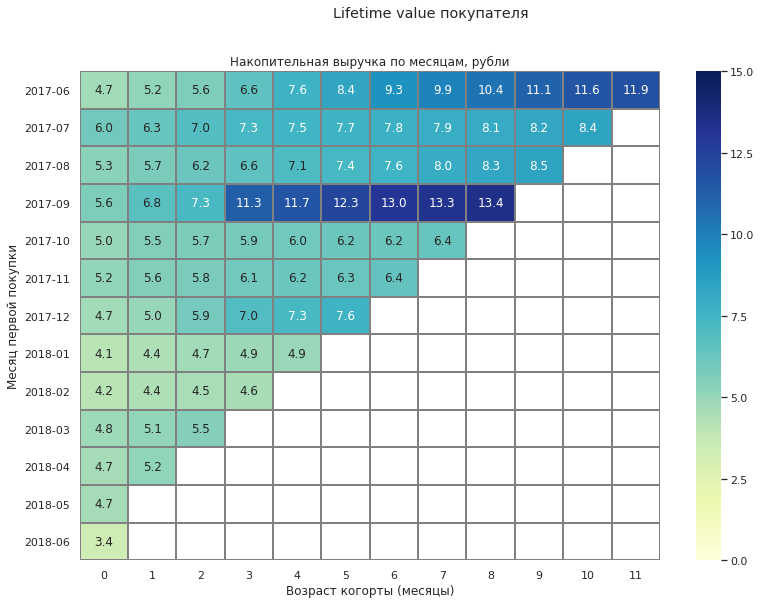

In [42]:
orders_grouped_by_cohorts['revenue_per_buyer']=orders_grouped_by_cohorts['revenue']/orders_grouped_by_cohorts['n_buyers_initialy']

b=orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='age',
    values='revenue_per_buyer',
    aggfunc='mean').reset_index()

b['first_purchase_month']=b['first_purchase_month'].dt.strftime('%Y-%m')

b=b.set_index('first_purchase_month')
b = b.cumsum(axis = 1)

plt.figure(figsize=(13, 9))
plt.suptitle('Lifetime value покупателя')
plt.title('Накопительная выручка по месяцам, рубли')

sns.heatmap(b, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=15)
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

За полгода покупатели всех когорт приносят в среднем больше 6 рублей. Выделяются покупатели четвертой когорты, которые в декабре делали крупные покупки.

Посмотрим, сколько всего компания заработала за год:

In [43]:
print("Выручка от продаж", orders_log['revenue'].sum().astype(int))

Выручка от продаж 252057


Узнаем, есть ли у сервиса крупные покупатели, чьи суммы покупок выделяются в общем ряду.

In [44]:
groupbyday_revenue_users=orders_log.pivot_table(index='uid', values='revenue', aggfunc='sum').reset_index()
groupbyday_revenue_users.sort_values(by='revenue', ascending=False)

,uid,revenue
11014,5539673724080479777,11810.18
22073,11149926373378902217,10519.46
35670,17999372575896145244,1979.33
13459,6731421022966725351,1450.68
7206,3644482766749211722,1444.29
...,...,...
3733,1879819502567241225,0.00
20343,10281425020415612933,0.00
364,184148767273119549,0.00
13094,6538135401269860305,0.00


8% выручки сервиса приходится на двух покупателей из 36 тыс. Это говорит о не очень устойчивом положении компании.

## Вывод

16% пользователей, посетивших сайт, совершили покупки (36,5 тыс. из 228 тыс.).

Лишь 17% покупателей за год совершили больше одной покупки, 2% пользователей совершили 4 покупки.

Один факт может говорить о том, что часть маркетинга Яндекс.Афиши эффективен и понятен пользователям. Так, 70% покупателей совершают первую покупку в день первого визита (а 10% покупателей - спустя два месяца после первого визита и больше). Возможно, стоит изучить портрет тех покуптелей, которые делали такие покупки на крупные суммы, чтобы расширить число пользователей, а также отправлять покупателям таргетные предложения. 

44% пользователей совершают одинаковое количество визитов и покупок. Примерно 25% пользователей посещают сайт в два раза больше раз, чем совершают покупки (это может быть два визита на одну покупку). Можно сделать вывод, что многие покупатели не посещают сайт регулярно, чтобы изучить продукт или новинки, а делают это единожды во время покупки. Возможно, таким покупателям стоит отправлять таргетные предложения.

Самые высокие средние чеки - у покупателей 4, 7 когорт. В некоторые месяцы средние чеки этих покупателей превышали 20 рублей. Однако в некоторых когортах чеки стабильно низкие.

За полгода покупатели всех когорт приносят в среднем больше 6 рублей. Выделяются покупатели четвертой когорты, которые в декабре делали крупные покупки.

8% выручки сервиса приходится на двух покупателей из 36 тыс. Это говорит о не очень устойчивом положении компании.

<a id='the_destination8'></a>
## Маркетинг. ROMI

Посещаемость  зависит от вложений в маркетинг.

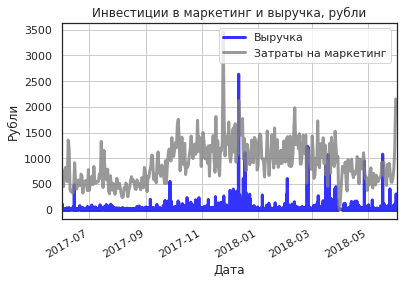

In [45]:
groupbyday_revenue=orders_log.groupby('buy_ts')['revenue'].sum()
groupbyday_revenue.columns=('buy_ts', 'revenue')

ax = groupbyday_revenue.plot(x='buy_ts', y='revenue', kind="line", legend=True, label='Выручка', color='blue', lw=3, alpha=0.8, grid=True)

groupbyday_costs_1=costs.groupby('dt')['costs'].sum()
groupbyday_costs_1.columns=('dt', 'costs')

groupbyday_costs_1.plot(ax=ax, x='dt', y='costs', kind="line", legend=True, label='Затраты на маркетинг', color='grey', lw=3, alpha=0.8, grid=True)
plt.title('Инвестиции в маркетинг и выручка, рубли')
plt.xlabel('Дата')
plt.ylabel('Рубли');

Мы видим, что график посещаемости сайта, который мы видели в предыдущей главе, полностью совпадает с графиком инвестиций в маркетинг. Но сумма выручки отличается. Это может значить, что не все крупные инвестиции оправданы.

Изучим, как тратились деньги на рекламу и как они окупались.

In [46]:
print("Траты на рекламу:", costs['costs'].sum().astype(int))


Траты на рекламу: 329131


На маркетинг за год было потрачено на 30% больше заработка за тот же период.

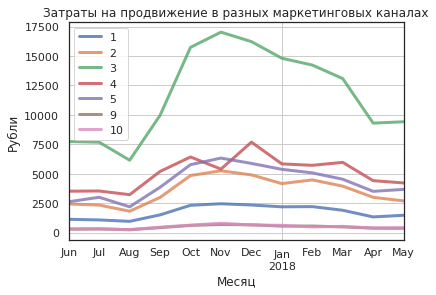

In [47]:
groupbyday_costs=costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').reset_index()
groupbyday_costs.set_index('month')

groupbyday_costs.columns=('month', '1', '2', '3', '4', '5', '9', '10')

groupbyday_costs.plot(x='month', kind="line", legend=True, lw=3, alpha=0.8, figsize=(6, 4), grid=True)
plt.title('Затраты на продвижение в разных маркетинговых каналах')
plt.xlabel('Месяц')
plt.ylabel('Рубли');

Очевидно, что большая часть рекламного бюджета была направлена в сентябре-апреле на маркетинговый источник 3.

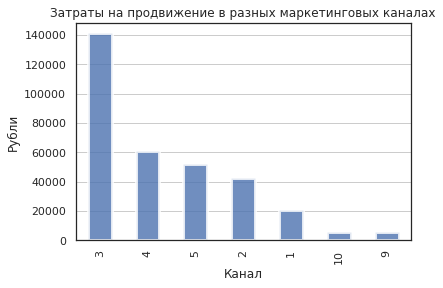

In [48]:
costs_sum=costs.pivot_table(index='source_id', values='costs', aggfunc='sum').reset_index()
costs_sum.set_index('source_id')
costs_sum=costs_sum.sort_values(by='costs', ascending=False)

costs_sum.plot(x='source_id', kind="bar", legend=False, lw=3, alpha=0.8, figsize=(6, 4)).grid(axis='y')
plt.title('Затраты на продвижение в разных маркетинговых каналах')
plt.xlabel('Канал')
plt.ylabel('Рубли');

42% рекламного бюджета было направлено на источник 3.

Посмотрим, сколько выручки принес каждый источник.

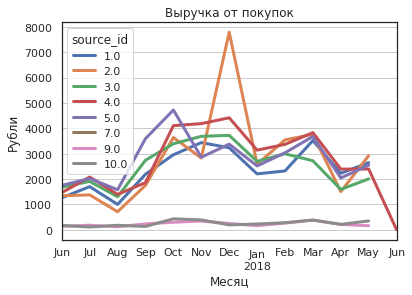

In [49]:
groupbyday_costs=visits_plus_purchases.pivot_table(index='buy_month', columns='source_id', values='revenue', aggfunc='sum').reset_index()
ax = plt.gca()
groupbyday_costs.plot(x='buy_month', ax=ax, kind="line", legend=True, figsize=(6, 4),lw=3).grid(axis='y')



plt.title('Выручка от покупок')
plt.xlabel('Месяц')
plt.ylabel('Рубли');


2 рекламный канал выделяется пиком. Покупатели, пришедшие из этого канала, принесли большую выручку в декабре.

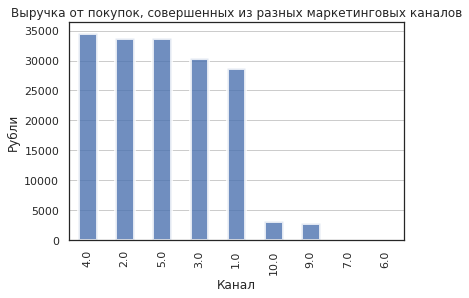

In [50]:
revenues_sources=visits_plus_purchases.pivot_table(index='source_id', values='revenue', aggfunc='sum').reset_index()
revenues_sources.set_index('source_id')

revenues_sources=revenues_sources.sort_values(by='revenue', ascending=False)


revenues_sources.plot(x='source_id', kind="bar", legend=False, lw=3, alpha=0.8, figsize=(6, 4)).grid(axis='y')
plt.title('Выручка от покупок, совершенных из разных маркетинговых каналов')
plt.xlabel('Канал')
plt.ylabel('Рубли');

## <span style="color:red">Что необходимо доработать<span>
Кажется, график имеет не тот заголовок

В сумме за весь период 5 каналов из 9 принесли больше всего выручки. Больше всего принесли три из них - 4, 2 и 5. Третий источник, на который было потрачено больше всего, принес меньше денег, чем упомянутые три источника.

Рассмотрим поведение когорт в разрезе не только месяцев, но и источников, из которых пришли пользователи. Для начала убедимся, что можно использовать для этого именно первый 

In [51]:
df=visits_plus_purchases.query('buy_month==buy_month').groupby('uid')['source_id'].nunique().reset_index()
print("Со скольких рекламных компаний на сайт приходил каждый из покупателей (учтены только визиты, завершившиеся покупками):")
print(df['source_id'].value_counts())

Со скольких рекламных компаний на сайт приходил каждый из покупателей (учтены только визиты, завершившиеся покупками):
1    27768
0     6729
2     1783
3      192
4       41
5       10
Name: source_id, dtype: int64


Как видим, большая часть пользователей приходили за покупками из одного рекламного источника, так что можно группировать когорты по первому источнику покупки.

Узнаем первый источник для каждого покупателя

In [52]:
costs_grouped=costs.pivot_table(index=['month', 'source_id'], values='costs', aggfunc='sum').reset_index()
costs_grouped_total=costs.pivot_table(index=['source_id'], values='costs', aggfunc='sum').reset_index()

In [53]:
they_buy=visits_plus_purchases.query('buy_month==buy_month').sort_values(by=['uid', 'buy_ts'])
they_buy['ordered_purchase']=they_buy.groupby('uid').cumcount()
they_buy['ordered_purchase']=they_buy['ordered_purchase']+1
they_buy_merge=they_buy.query('ordered_purchase==1')
they_buy_merge=they_buy_merge.rename(columns = {'source_id':'first_source'})

visits_plus_purchases=pd.merge(visits_plus_purchases, they_buy_merge[['uid', 'first_source']], on=['uid'], how='left')

In [54]:
cohorts_sources_breakdown_total=visits_plus_purchases.query('buy_month==buy_month').pivot_table(index = ('source_id'),
                                               values=['uid', 'revenue'],
                                               aggfunc=({'uid':'nunique', 'revenue':'sum'})).reset_index()
                                                            
cohorts_sources_breakdown_total.columns = ('source_id', 'revenue', 'count_users')
                
cohorts_sources_breakdown_total=pd.merge(cohorts_sources_breakdown_total, costs_grouped_total[['costs','source_id']], on=['source_id'])

cohorts_sources_breakdown_total['ltv']=cohorts_sources_breakdown_total['revenue']/cohorts_sources_breakdown_total['count_users']
cohorts_sources_breakdown_total['cac']=cohorts_sources_breakdown_total['costs']/cohorts_sources_breakdown_total['count_users']
cohorts_sources_breakdown_total['romi']=cohorts_sources_breakdown_total['ltv']/cohorts_sources_breakdown_total['cac']

display(cohorts_sources_breakdown_total)

,source_id,revenue,count_users,costs,ltv,cac,romi
0,1.0,28709.91,4336,20833.27,6.621289,4.804721,1.378080
1,2.0,33760.87,3693,42806.04,9.141855,11.591129,0.788694
2,3.0,30449.76,7584,141321.63,4.015000,18.634181,0.215464
3,4.0,34638.76,8205,61073.60,4.221665,7.443461,0.567164
4,5.0,33732.60,6449,51757.10,5.230671,8.025601,0.651748
5,9.0,2763.54,770,5517.49,3.589013,7.165571,0.500869
6,10.0,3089.27,1086,5822.49,2.844632,5.361409,0.530575


Посчитаем окупаемость когорт - в целом и по разным источникам.

In [55]:
cohorts_sources_breakdown=visits_plus_purchases.query('buy_month==buy_month').pivot_table(index = ('first_purchase_month', 'first_source'),
                                               values=['uid', 'revenue'],
                                               aggfunc=({'uid':'nunique', 'revenue':'sum'})).reset_index()
                                                            
cohorts_sources_breakdown.columns = ('month', 'source_id', 'revenue', 'count_users')
                
cohorts_sources_breakdown=pd.merge(cohorts_sources_breakdown, costs_grouped[['costs','month','source_id']], on=['month', 'source_id'])

cohorts_sources_breakdown['ltv']=cohorts_sources_breakdown['revenue']/cohorts_sources_breakdown['count_users']
cohorts_sources_breakdown['cac']=cohorts_sources_breakdown['costs']/cohorts_sources_breakdown['count_users']
cohorts_sources_breakdown['romi']=cohorts_sources_breakdown['ltv']/cohorts_sources_breakdown['cac']

display(cohorts_sources_breakdown)

,month,source_id,revenue,count_users,costs,ltv,cac,romi
0,2017-06-01,1.0,7930.33,226,1125.61,35.089956,4.980575,7.045362
1,2017-06-01,2.0,3843.49,209,2427.38,18.389904,11.614258,1.583390
2,2017-06-01,3.0,2484.70,531,7731.65,4.679284,14.560546,0.321367
3,2017-06-01,4.0,1733.20,342,3514.80,5.067836,10.277193,0.493115
4,2017-06-01,5.0,3449.74,363,2616.12,9.503416,7.206942,1.318647
...,...,...,...,...,...,...,...,...
79,2018-05-01,3.0,1762.64,521,9411.42,3.383186,18.064146,0.187287
80,2018-05-01,4.0,2176.25,548,4214.21,3.971259,7.690164,0.516408
81,2018-05-01,5.0,1920.18,466,3669.56,4.120558,7.874592,0.523273
82,2018-05-01,9.0,111.53,29,362.17,3.845862,12.488621,0.307949


In [56]:
cohorts_sources_breakdown_more=visits_plus_purchases.query('buy_month==buy_month').pivot_table(index = ('first_purchase_month', 'first_source', 'buy_month'),
                                               values=['revenue'],
                                               aggfunc=('sum')).reset_index()
                                                            
cohorts_sources_breakdown_more.columns = ('month', 'source_id', 'buy_month', 'revenue_for_month')
print(cohorts_sources_breakdown_more)

cohorts_sources_breakdown_more=pd.merge(cohorts_sources_breakdown_more, cohorts_sources_breakdown[['month', 'source_id', 'count_users', 'costs', 'revenue']], on=['month', 'source_id'])


         month  source_id  buy_month  revenue_for_month
0   2017-06-01        1.0 2017-06-01            1372.71
1   2017-06-01        1.0 2017-07-01             458.74
2   2017-06-01        1.0 2017-08-01             430.02
3   2017-06-01        1.0 2017-09-01             744.56
4   2017-06-01        1.0 2017-10-01             748.18
..         ...        ...        ...                ...
497 2018-05-01        4.0 2018-05-01            2176.25
498 2018-05-01        5.0 2018-05-01            1920.18
499 2018-05-01        9.0 2018-05-01             111.53
500 2018-05-01       10.0 2018-05-01             328.17
501 2018-06-01        4.0 2018-06-01               3.42

[502 rows x 4 columns]


In [57]:
cohorts_sources_breakdown_more['age'] = (cohorts_sources_breakdown_more['buy_month'] - cohorts_sources_breakdown_more['month'])/ np.timedelta64(1, 'M')
cohorts_sources_breakdown_more['age'] = cohorts_sources_breakdown_more['age'].round().astype('int')


In [58]:
cohorts_sources_breakdown_more['ltv']=cohorts_sources_breakdown_more['revenue_for_month']/cohorts_sources_breakdown_more['count_users']
cohorts_sources_breakdown_more['cac']=cohorts_sources_breakdown_more['costs']/cohorts_sources_breakdown_more['count_users']
cohorts_sources_breakdown_more['romi']=cohorts_sources_breakdown_more['ltv']/cohorts_sources_breakdown_more['cac']

In [59]:
cohorts_sources_breakdown_more

,month,source_id,buy_month,revenue_for_month,count_users,costs,revenue,age,ltv,cac,romi
0,2017-06-01,1.0,2017-06-01,1372.71,226,1125.61,7930.33,0,6.073938,4.980575,1.219525
1,2017-06-01,1.0,2017-07-01,458.74,226,1125.61,7930.33,1,2.029823,4.980575,0.407548
2,2017-06-01,1.0,2017-08-01,430.02,226,1125.61,7930.33,2,1.902743,4.980575,0.382033
3,2017-06-01,1.0,2017-09-01,744.56,226,1125.61,7930.33,3,3.294513,4.980575,0.661472
4,2017-06-01,1.0,2017-10-01,748.18,226,1125.61,7930.33,4,3.310531,4.980575,0.664688
...,...,...,...,...,...,...,...,...,...,...,...
495,2018-05-01,3.0,2018-05-01,1762.64,521,9411.42,1762.64,0,3.383186,18.064146,0.187287
496,2018-05-01,4.0,2018-05-01,2176.25,548,4214.21,2176.25,0,3.971259,7.690164,0.516408
497,2018-05-01,5.0,2018-05-01,1920.18,466,3669.56,1920.18,0,4.120558,7.874592,0.523273
498,2018-05-01,9.0,2018-05-01,111.53,29,362.17,111.53,0,3.845862,12.488621,0.307949


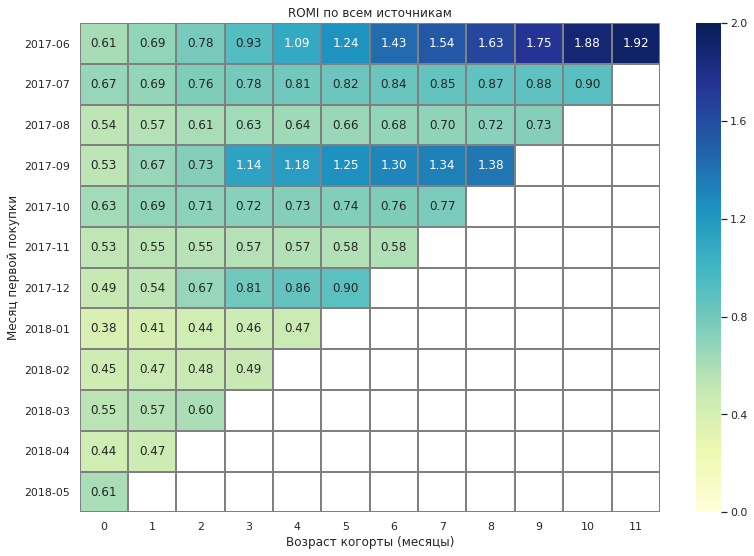

In [60]:
output_all = cohorts_sources_breakdown_more.pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_all['month']=output_all['month'].dt.strftime('%Y-%m')
output_all=output_all.set_index('month')


output_all=output_all.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_all, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по всем источникам')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

## Вывод

На маркетинг за год было потрачено на 30% больше заработка за тот же период.

42% рекламного бюджета было направлено на рекламный источник 3, в результате он оказался дальше всего от окупаемости. Этот источник "отбил" лишь 20% вложенных денег. Окупился только 1й источник, принеся на 40% больше ,чем в него вложили; 2й источник приближается к окупаемости.

В сумме за весь период 5 каналов принесли больше всего выручки. Больше всего принесли три из них - 2, 4 и 5. Третий источник, принес меньше денег, чем упомянутые три источника, но он тоже вошел в топ-5.

Большая часть пользователей приходили за покупками из одного рекламного источника.

За полгода окупилась только первая и четвертая когорта пользователей. За три месяца сопостовимый результат показали также вторая и пятая когорта, но впоследствии они не окупились.

<a id='the_destination9'></a>
## Приложение. ROMI по разным источникам по когортам

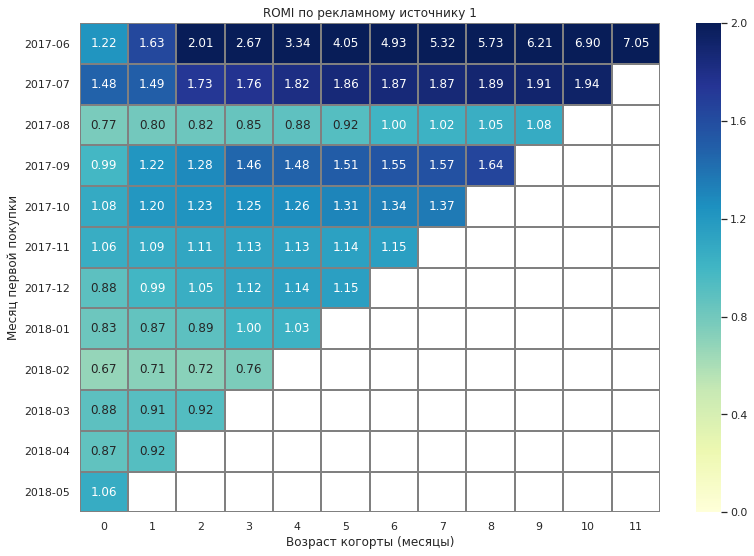

In [61]:
output_1 = cohorts_sources_breakdown_more.query('source_id==1').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_1['month']=output_1['month'].dt.strftime('%Y-%m')
output_1=output_1.set_index('month')


output_1=output_1.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_1, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 1')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

Первый рекламный источник в половине когорт окупился в первый месяц. Затраты на него одни из самых низких.

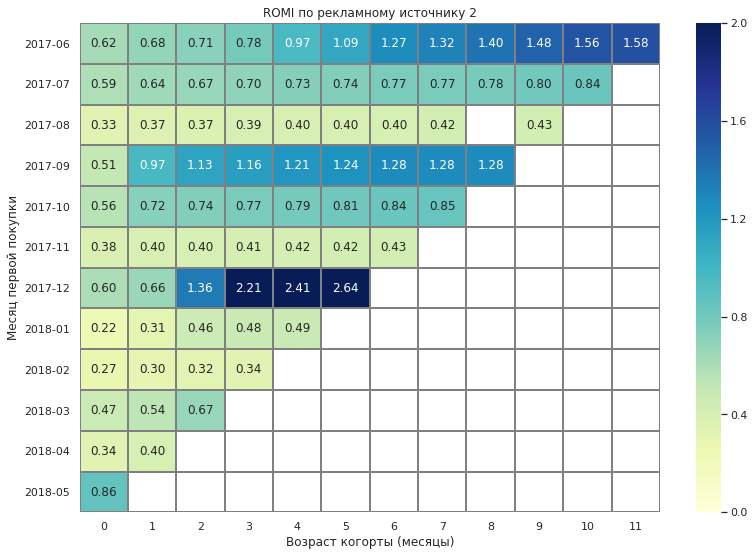

In [62]:
output_2 = cohorts_sources_breakdown_more.query('source_id==2').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_2['month']=output_2['month'].dt.strftime('%Y-%m')
output_2=output_2.set_index('month')


output_2=output_2.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_2, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 2')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

Лишь одна когорта (декабрь 2017) окупилась по второму рекламному источнику в первые полгода.

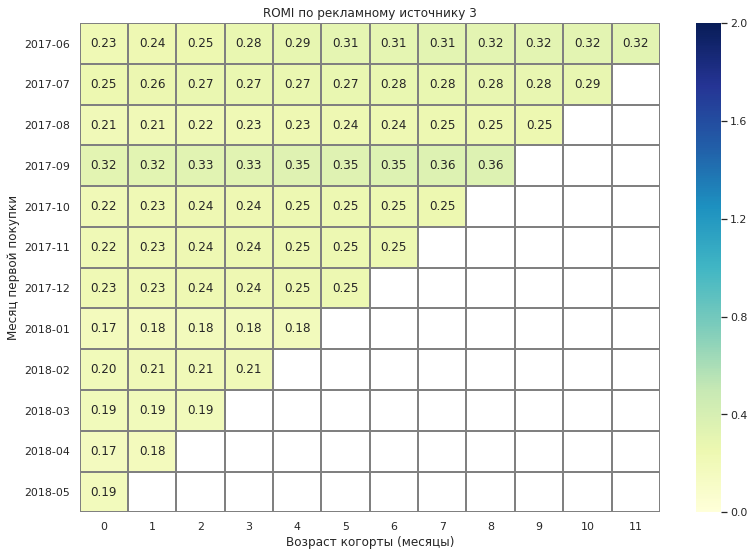

In [63]:
output_3 = cohorts_sources_breakdown_more.query('source_id==3').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_3['month']=output_3['month'].dt.strftime('%Y-%m')
output_3=output_3.set_index('month')


output_3=output_3.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_3, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 3')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

Третий источник показал самый плохой результат ROMI

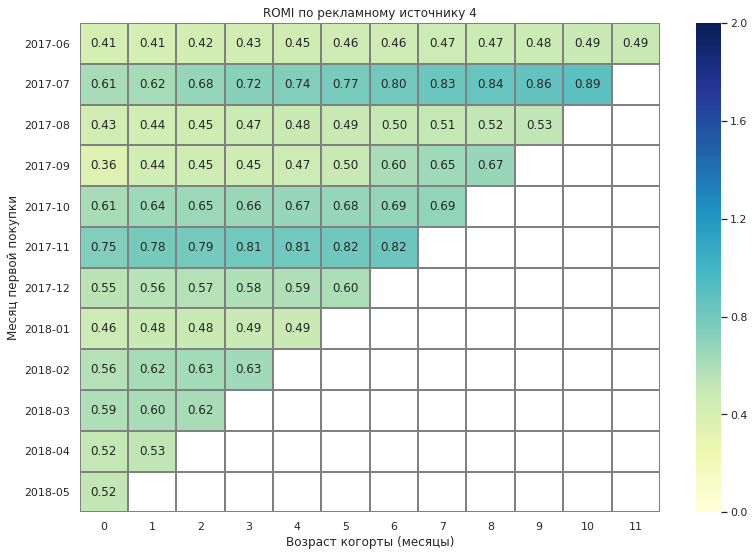

In [64]:
output_4 = cohorts_sources_breakdown_more.query('source_id==4').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_4['month']=output_4['month'].dt.strftime('%Y-%m')
output_4=output_4.set_index('month')


output_4=output_4.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_4, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 4')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

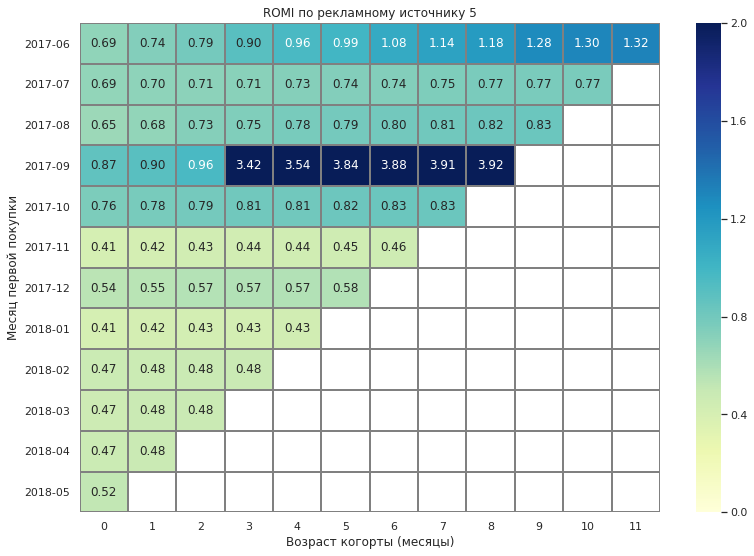

In [65]:
output_5 = cohorts_sources_breakdown_more.query('source_id==5').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_5['month']=output_5['month'].dt.strftime('%Y-%m')
output_5=output_5.set_index('month')


output_5=output_5.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_5, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 5')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

Две когорты, пришедшие из 5 источника, оказались успешными. Первая когорта окупилась на 8 месяц, а 4я - на 4й.

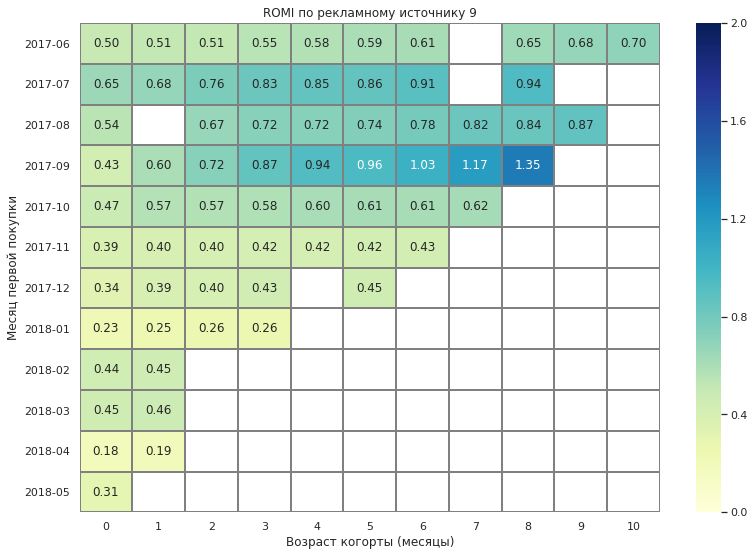

In [66]:
output_9 = cohorts_sources_breakdown_more.query('source_id==9').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_9['month']=output_9['month'].dt.strftime('%Y-%m')
output_9=output_9.set_index('month')


output_9=output_9.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_9, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 9')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

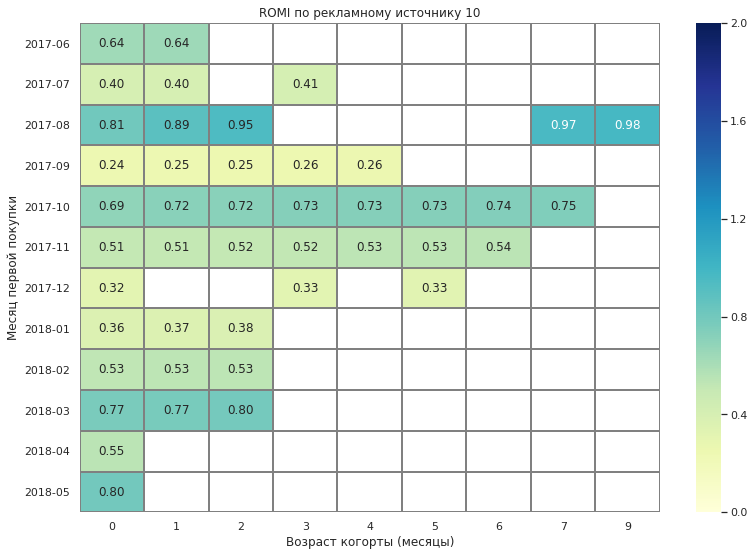

In [67]:
output_10 = cohorts_sources_breakdown_more.query('source_id==10').pivot_table(
        index='month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').reset_index()

output_10['month']=output_10['month'].dt.strftime('%Y-%m')
output_10=output_10.set_index('month')


output_10=output_10.cumsum(axis=1)

plt.figure(figsize=(13, 9))


sns.heatmap(output_10, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="YlGnBu", vmin=0, vmax=2)
plt.title('ROMI по рекламному источнику 10')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('Месяц первой покупки');

Некоторые когорты близки к окупаемости, хотя покупатели нерегулярно пользуются этим источником.

<a id='the_destination10'></a>

## Вывод

- Посещаемость

В среднем в день на сайте было 930 уникальных посетителей, в неделю - 5,8 тыс., а в месяц 23,5 тыс.
Показатель sticky_mau очень низкий, всего три. Это значит, что пользователи редко возвращаются на сайт.

В изученный год число пользовательских сессий колебалось от 500 до 1,5 тыс. в день. Наблюдались однодневные пики с большей посещаемостью - до более чем 4 тыс. в день.

В целом в последние месяцы наблюдается спад пользовательской активности по сравнению с предыдущим периодом. В конце изучаемого года наметился пик, который может оказаться кратковременным. С августа по ноябрь происходил рост посещаемости сайта - она выросла с меньше чем 15-18 тыс. пользовательских сессий в месяц до примерно 45 тыс. Затем посещаемость пошла на спад. В последние два месяца она составляет около 28 тыс. в месяц.

На графике видны отдельные дни с пиковой посещаемостью, когда на сайт пришло больше 4 тыс. человек.

Пользовательские сессии с мобильного длятся около 7,5 минут, а с десктопа - 10-13 минут.

На десктопе 9% пользовательских сессий длятся 0 секунд, на мобильном - 12,5%. Это значит, что на мобильном могут быть технические проблемы с сайтом: он хуже прогружается или не открывается в некоторых браузерах.

В среднем один пользователь посетил сайт за год один раз.

Больше 70% пользователей посещали сайт за изученный период (12 месяцев) лишь один раз. Около 5% пользователей посещали сайт 4 и больше раз.

Очень мало пользователей возвращается после первого посещения. К последним месяцам жизни когорты активность пользователей почти сходит на нет. На второй месяц после первого посещения в большинстве когорт посещаемость составляла 6-9% от уровня первого месяца, а к последним месяцам жизни большинства когорт не превышала 3%.

- Покупки

16% пользователей, посетивших сайт, совершили покупки (36,5 тыс. из 228 тыс.).

Лишь 17% покупателей за год совершили больше одной покупки, 2% пользователей совершили 4 покупки.

Один факт может говорить о том, что часть маркетинга Яндекс.Афиши эффективен и понятен пользователям. Так, 70% покупателей совершают первую покупку в день первого визита (а 10% покупателей - спустя два месяца после первого визита и больше). Возможно, стоит изучить портрет тех покуптелей, которые делали такие покупки на крупные суммы, чтобы расширить число пользователей, а также отправлять покупателям таргетные предложения. 

44% пользователей совершают одинаковое количество визитов и покупок. Примерно 25% пользователей посещают сайт в два раза больше раз, чем совершают покупки (это может быть два визита на одну покупку). Можно сделать вывод, что многие покупатели не посещают сайт регулярно, чтобы изучить продукт или новинки, а делают это единожды во время покупки. Возможно, таким покупателям стоит отправлять таргетные предложения.

Самые высокие средние чеки - у покупателей 4, 7 когорт (они пришли на сайт в сентябре и декабре 2017 года). В некоторые месяцы средние чеки этих покупателей превышали 20 рублей. Однако в некоторых когортах чеки стабильно низкие.

За полгода покупатели всех когорт приносят в среднем больше 6 рублей. Выделяются покупатели четвертой когорты, которые в декабре делали крупные покупки.

8% выручки сервиса приходится на двух покупателей из 36 тыс. Это говорит о не очень устойчивом положении компании.

- Маркетинг

Посещаемость и число покупок связано с маркетинговыми вливаниями, но суммы покупок зависят от этого не так сильно. Возможно, стоит изучить поведение покупателей, которые делали крупные покупки, изучить их потребноти и постараться наращивать аудиторию за счет.

На маркетинг за год было потрачено на 30% больше заработка за тот же период.

42% рекламного бюджета было направлено на рекламный источник 3, в результате он оказался дальше всего от окупаемости. Этот источник "отбил" лишь 20% вложенных денег.

Окупился только 1й источник, принеся на 40% больше ,чем в него вложили; 2й источник приближается к окупаемости.

В сумме за весь период 5 каналов принесли больше всего выручки. Больше всего принесли три из них - 2, 4 и 5. Третий источник, принес меньше денег, чем упомянутые три источника, но он тоже вошел в топ-5.

Большая часть пользователей приходили за покупками из одного рекламного источника.

- Рекомендации:

Пересмотреть траты на рекламные каналы. Рекламный канал номер три обходится слишком дорого и не окупается.

Изучить, почему многие покупатели не возвращаются.

Проверить, почему многие пользовательские сессии длятся 0 минут.